In [1]:
# IMPORT PACKAGES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

---


In [2]:
# LOAD DATASET INTO DATAFRAME
data = pd.read_csv("tiktok_dataset.csv")


---

In [3]:
# DISPLAY AND EXAMINE THE FIRST TEN ROWS OF THE DATAFRAME
data.head(5)

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


---

In [4]:
# GET SUMMARY INFO
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


## Column Description
### 1. `#`
**Row identifier / index column**
- A sequential number assigned to each row.
- Does not contain analytical information.
---
### 2. `claim_status`
**Indicates whether the video contains a claim**
- Categorical variable.
- Specifies if the content presents a claim or statement.

*A claim refers to a statement presented as factual information that can potentially be verified or fact-checked.*
#### *Possible Values*
- *Claim* – *The video includes a factual statement or assertion.*  
- *Opinion* – *The video expresses a personal belief, interpretation, or subjective view rather than a verifiable fact.*
#### *Why It Is Relevant*
*The claim status is important because:*
- *It helps distinguish factual content from subjective opinions.*  
- *It supports misinformation detection and fact-checking analysis.*  
- *It allows comparison of engagement patterns between claim-based and opinion-based content.*  
- *It can be used as a target variable in predictive modeling (e.g., identifying videos likely to contain claims).*  
---
### 3. `video_id`
**Unique video identifier**
- Unique ID assigned to each TikTok video.
---
### 4. `video_duration_sec`
**Video length in seconds**
- Represents the duration of the video.
- Can be used to analyze whether video length influences engagement.
---
### 5. `video_transcription_text`
**Transcribed spoken content of the video**
- Text variable.
- Contains the speech-to-text transcription.
- Useful for Natural Language Processing (NLP) tasks such as:
  - Sentiment analysis
  - Topic modeling
  - Claim detection
---
### 6. `verified_status`
**Verification status of the account**
- Categorical variable.
- Indicates whether the creator’s account is verified.
- May influence credibility and engagement.
---
### 7. `author_ban_status`
**Ban status of the content creator**
- Categorical variable.
- Indicates whether the creator has been banned or restricted.
- Useful for moderation or policy analysis.
---
### 8. `video_view_count`
**Number of views**
- Numeric variable.
- Total number of times the video has been viewed.
- Key performance metric.
---
### 9. `video_like_count`
**Number of likes**
- Numeric variable.
- Indicates how many users liked the video.
- Often used to measure audience appreciation.
---
### 10. `video_share_count`
**Number of shares**
- Numeric variable.
- Represents how often the video was shared.
- Indicates viral potential.
---
### 11. `video_download_count`
**Number of downloads**
- Numeric variable.
- Shows how many users downloaded the video.
- Can indicate strong interest or reuse potential.
---
### 12. `video_comment_count`
**Number of comments**
- Numeric variable.
- Reflects audience interaction and discussion level.
- Often associated with engagement intensity.
---

In [5]:
# SUMMARY STATISTICS OF THE DATASET
data.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


---

Since some videos go viral and accumulate extremely high view counts, these outliers can distort the overall statistics. Therefore, it is important to examine the distribution of the data more closely.

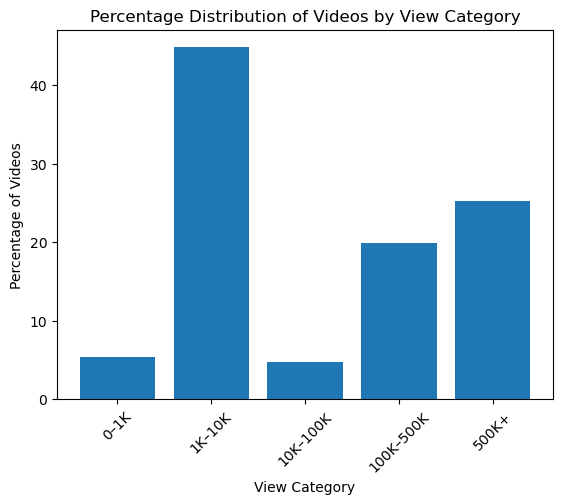

Absolute Counts:
view_category
0–1K         1021
1K–10K       8551
10K–100K      903
100K–500K    3790
500K+        4819
Name: count, dtype: int64


In [6]:
# CHECKING DATA DISTRIBUTION


# Define view count bins
bins = [0, 1000, 10000, 100000, 500000, np.inf]
labels = ["0–1K", "1K–10K", "10K–100K", "100K–500K", "500K+"]

# Create view category feature
data['view_category'] = pd.cut(
    data['video_view_count'],
    bins=bins,
    labels=labels,
    include_lowest=True
)

# Calculate percentage share per category
category_share = (
    data['view_category']
    .value_counts(normalize=True)
    .reindex(labels)
) * 100

# Plot distribution
plt.figure()
plt.bar(category_share.index.astype(str), category_share.values)
plt.xlabel("View Category")
plt.ylabel("Percentage of Videos")
plt.title("Percentage Distribution of Videos by View Category")
plt.xticks(rotation=45)
plt.show()

# Print absolute counts
print("Absolute Counts:")
print(data['view_category'].value_counts().reindex(labels))

Most videos fall into the 1K–10K Range.

However, a large number of videos (4,819) reach 500K+ views, indicating a strong presence of high-performing content.

The relatively small number of videos in the 10K–100K category suggests that performance is not evenly distributed. Instead, videos tend to cluster in lower or very high view ranges.

IMPORTANT:
This uneven distribution may influence mean-based statistics and should be considered in further analysis.

---

# Descriptive Overview

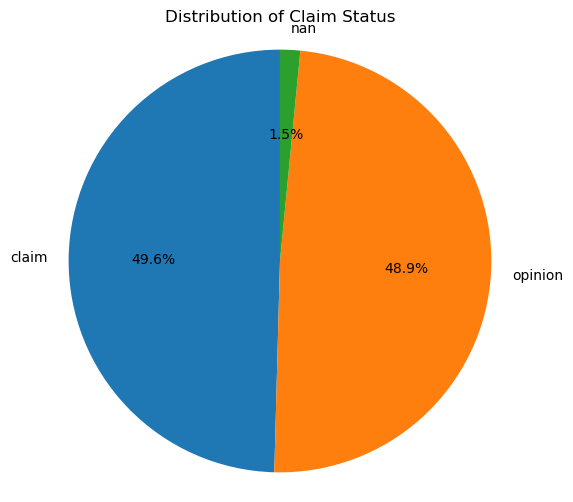

In [7]:
# DISTRIBUTION OF CLAIM STATUS

claim_counts = data["claim_status"].value_counts(dropna=False)

plt.figure(figsize=(6,6))
plt.pie(
    claim_counts,
    labels=claim_counts.index,
    autopct="%1.1f%%",
    startangle=90
)

plt.title("Distribution of Claim Status")
plt.axis("equal")
plt.show()


The dataset appears balanced between *claim* and *opinion* categories, however wu have some missing values.

In [8]:
data["claim_status"].value_counts(dropna=False)

claim_status
claim      9608
opinion    9476
NaN         298
Name: count, dtype: int64

#### *Missing Values (NaN)*

*The presence of **298 missing values (NaN)** indicates that for these observations, the claim status was* *not recorded or could not be determined.*
*In datasets, NaN (Not a Number) represents missing or undefined values. Missing values can occur due to:*

- *Incomplete data collection*  
- *Errors during data entry*  
- *Issues in preprocessing or labeling*  
- *Ambiguous content that could not be classified*  


---

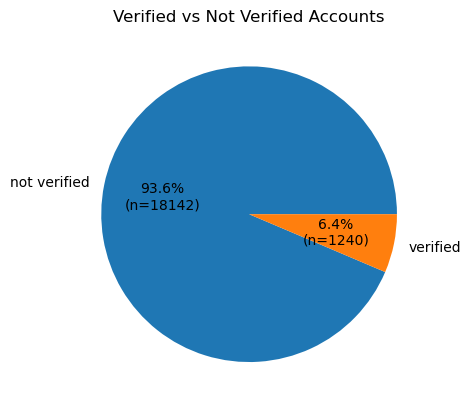

In [9]:
# DISTRIBUTION OF VERIFIED VS. UNVERIFIED ACCOUNTS

# Calculate counts
verified_counts = data["verified_status"].value_counts(dropna=False)

# Create pie chart
plt.figure()

plt.pie(
    verified_counts.values,
    labels=verified_counts.index.astype(str),
    autopct=lambda pct: f"{pct:.1f}%\n(n={int(round(pct/100 * verified_counts.sum()))})"
)

plt.title("Verified vs Not Verified Accounts")
plt.show()


The dataset is strongly imbalanced, with the majority of videos posted by non-verified accounts. Verified creators represent only a small portion of the data. This imbalance should be considered when comparing engagement metrics.


---

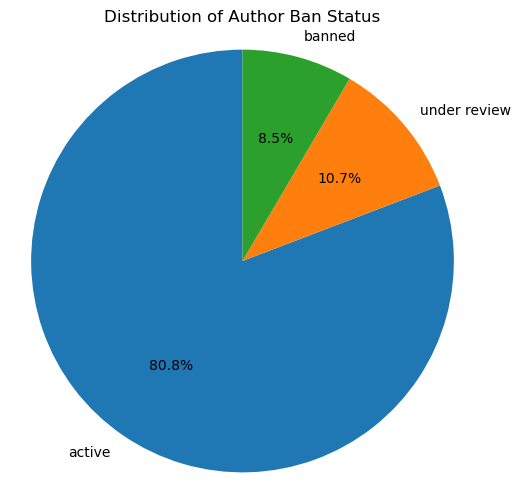

In [10]:
# DISTRIBUTION OF AUTHOR BAN STATUS

ban_counts = data["author_ban_status"].value_counts(dropna=False)

plt.figure(figsize=(6,6))
plt.pie(
    ban_counts,
    labels=ban_counts.index,
    autopct="%1.1f%%",
    startangle=90
)

plt.title("Distribution of Author Ban Status")
plt.axis("equal")
plt.show()


Most authors are currently active. A smaller portion is either under review or banned. This indicates that while the majority of content comes from compliant users, a notable number of accounts are subject to moderation actions.

---

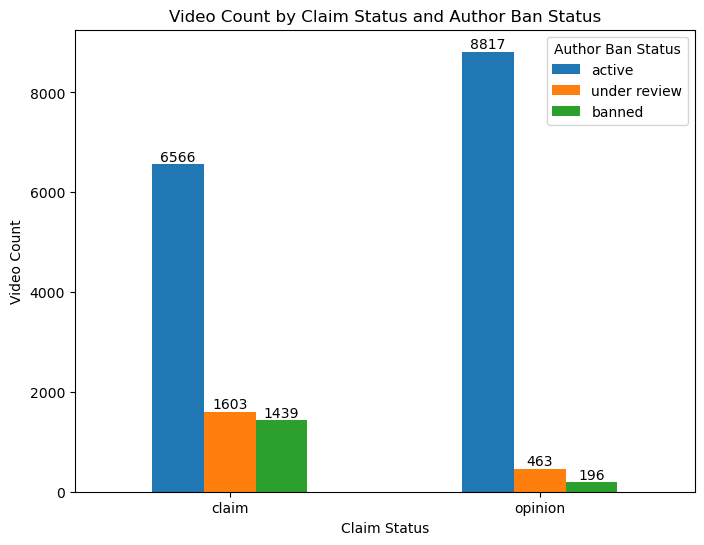

In [11]:
# VIDEO COUNT BY CLAIM STATUS AND AUTHOR BAN STATUS

# Group by claim_status and author_ban_status and count videos
grouped = data.groupby(
    ["claim_status", "author_ban_status"]
).size().reset_index(name="video_count")

# Convert to pivot format for easier plotting
pivot_data = grouped.pivot(
    index="claim_status",
    columns="author_ban_status",
    values="video_count"
)

# Define desired column order
desired_order = ["active", "under review", "banned"]

# Reorder columns (only keep those that exist in the dataset)
pivot_data = pivot_data[
    [col for col in desired_order if col in pivot_data.columns]
]

# Create grouped bar chart
ax = pivot_data.plot(kind="bar", figsize=(8,6))

# Add titles and labels
plt.title("Video Count by Claim Status and Author Ban Status")
plt.xlabel("Claim Status")
plt.ylabel("Video Count")
plt.xticks(rotation=0)
plt.legend(title="Author Ban Status")

# Add value labels on top of bars
for container in ax.containers:
    ax.bar_label(container)

plt.show()



Most videos, regardless of claim status, are posted by active authors.
However, claim-based content shows a notably higher number of banned and under-review accounts compared to opinion-based content. This suggests that videos containing claims may be more frequently associated with moderation actions.

# Reach and Visibility

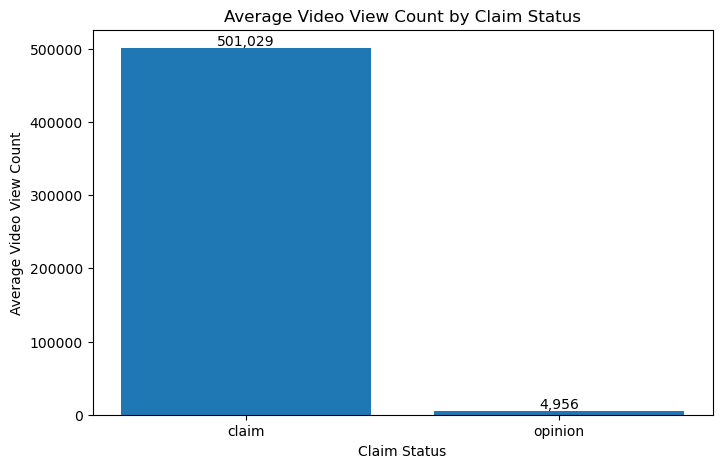

In [12]:
# AVERAGE VIDEO VIEW COUNT BY CLAIM STATUS

avg_views = data.groupby("claim_status", as_index=False)["video_view_count"].mean()
plt.figure(figsize=(8,5))
bars = plt.bar(
    avg_views["claim_status"],
    avg_views["video_view_count"]
)

plt.title("Average Video View Count by Claim Status")
plt.xlabel("Claim Status")
plt.ylabel("Average Video View Count")

for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        yval,
        f"{yval:,.0f}",
        ha='center',
        va='bottom'
    )

plt.show()


Claim-based videos receive significantly more views than opinion-based videos. This indicates a substantial performance gap, suggesting that claim-driven content attracts considerably higher audience attention.

---

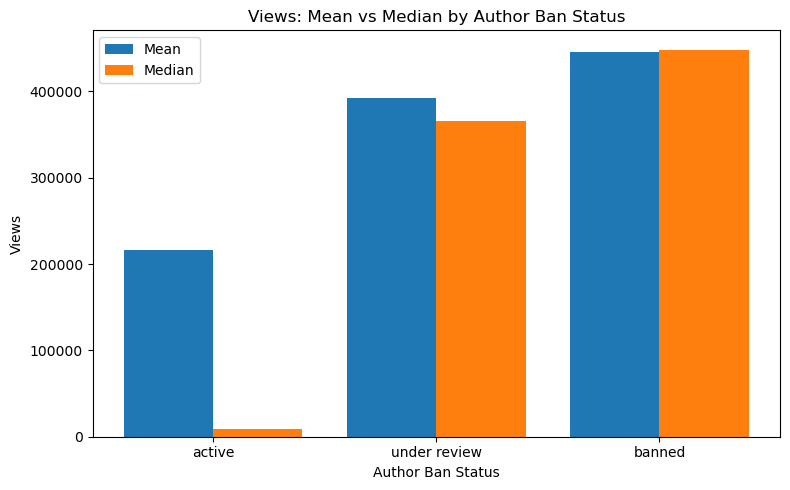

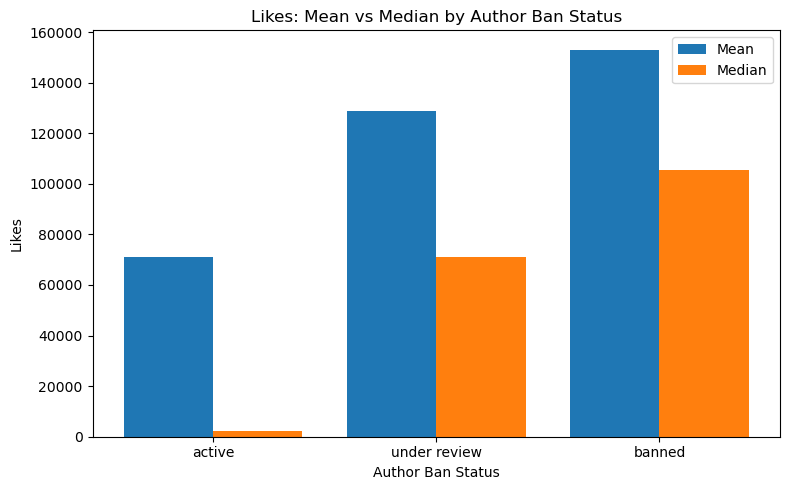

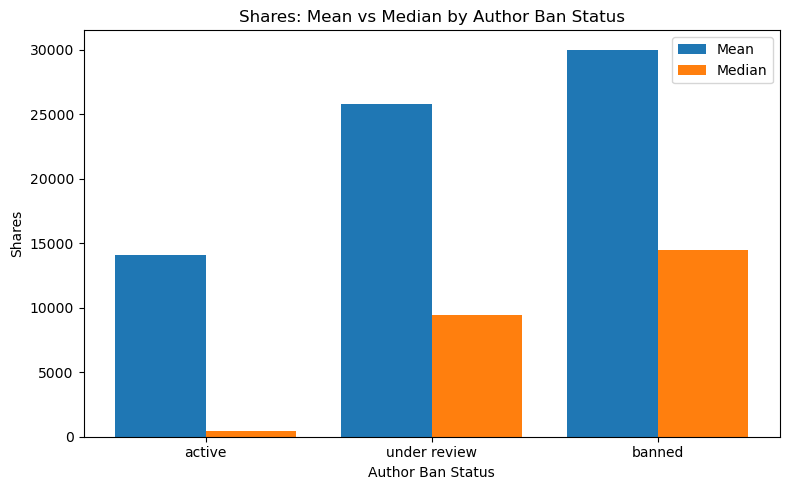

In [13]:
# COMPARISON OF MEAN AND MEDIAN ENGAGEMENT METRICS ACROSS AUTHOR BAN CATEGORIES

# Build result table (mean & median per ban status) ---
order = ["active", "under review", "banned"]
metrics = ["video_view_count", "video_like_count", "video_share_count"]
titles = ["Views", "Likes", "Shares"]

# Create the multi-index result (this is what your plotting code expects)
result = (
    data
    .groupby("author_ban_status")[metrics]
    .agg(["mean", "median"])
)

# Extract mean and median tables from the multi-index columns
mean_df = result.xs("mean", axis=1, level=1)
median_df = result.xs("median", axis=1, level=1)

# Ensure desired order (only keep statuses that exist)
idx = [s for s in order if s in mean_df.index]
mean_df = mean_df.loc[idx]
median_df = median_df.loc[idx]

# Plot: for each metric, show Mean vs Median side-by-side ---
for metric, title in zip(metrics, titles):
    plt.figure(figsize=(8, 5))

    x = range(len(mean_df.index))
    w = 0.4

    plt.bar([i - w/2 for i in x], mean_df[metric], width=w, label="Mean")
    plt.bar([i + w/2 for i in x], median_df[metric], width=w, label="Median")

    plt.title(f"{title}: Mean vs Median by Author Ban Status")
    plt.xlabel("Author Ban Status")
    plt.ylabel(title)
    plt.xticks(list(x), mean_df.index, rotation=0)
    plt.legend()
    plt.tight_layout()
    plt.show()

Videos from *banned* and *under review* accounts have substantially higher median view, like, and share counts compared to active accounts.

---

In [14]:
# Create new Columns for Relative Engagement Metrics (Per View)

# Create a likes_per_view column
data["likes_per_view"] = data["video_like_count"] / data["video_view_count"]

# Create a comments_per_view column
data["comments_per_view"] = data["video_comment_count"] / data["video_view_count"]

# Create a shares_per_view column
data["shares_per_view"] = data["video_share_count"] / data["video_view_count"]

---

# Engagement Dynamics

In [15]:
# INTERACTION EFFECTS: ENGAGEMENT RATES ACROSS CLAIM AND MODERATION STATUS

data.groupby(
    ["claim_status", "author_ban_status"]
).agg(
    likes_per_view_count=("likes_per_view", "count"),
    likes_per_view_mean=("likes_per_view", "mean"),
    likes_per_view_median=("likes_per_view", "median"),

    comments_per_view_count=("comments_per_view", "count"),
    comments_per_view_mean=("comments_per_view", "mean"),
    comments_per_view_median=("comments_per_view", "median"),

    shares_per_view_count=("shares_per_view", "count"),
    shares_per_view_mean=("shares_per_view", "mean"),
    shares_per_view_median=("shares_per_view", "median"),
)



likes_per_view_count  likes_per_view_mean  \
claim_status author_ban_status                                              
claim        active                             6566             0.329542   
             banned                             1439             0.345071   
             under review                       1603             0.327997   
opinion      active                             8817             0.219744   
             banned                              196             0.206868   
             under review                        463             0.226394   

                                likes_per_view_median  \
claim_status author_ban_status                          
claim        active                          0.326538   
             banned                          0.358909   
             under review                    0.320867   
opinion      active                          0.218330   
             banned                          0.198483   
             under review                    0.228051   

                                comments_per_view_count  \
claim_status author_ban_status                            
claim        active                                6566   
             banned                                1439   
             under review                          1603   
opinion      active                                8817   
             banned                                 196   
             under review                           463   

                                comments_per_view_mean  \
claim_status author_ban_status                           
claim        active                           0.001393   
             banned                           0.001377   
             under review                     0.001367   
opinion      active                           0.000517   
             banned                           0.000434   
             under review                     0.000536   

                                comments_per_view_median  \
claim_status author_ban_status                             
claim        active                             0.000776   
             banned                             0.000746   
             under review                       0.000789   
opinion      active                             0.000252   
             banned                             0.000193   
             under review                       0.000293   

                                shares_per_view_count  shares_per_view_mean  \
claim_status author_ban_status                                                
claim        active                              6566              0.065456   
             banned                              1439              0.067893   
             under review                        1603              0.065733   
opinion      active                              8817              0.043729   
             banned                               196              0.040531   
             under review                         463              0.044472   

                                shares_per_view_median  
claim_status author_ban_status                          
claim        active                           0.049279  
             banned                           0.051606  
             under review                     0.049967  
opinion      active                           0.032405  
             banned                           0.030728  
             under review                     0.035027

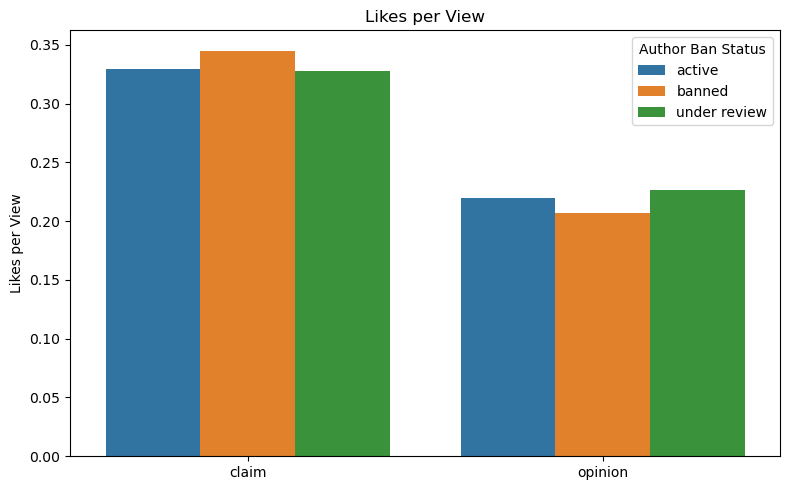

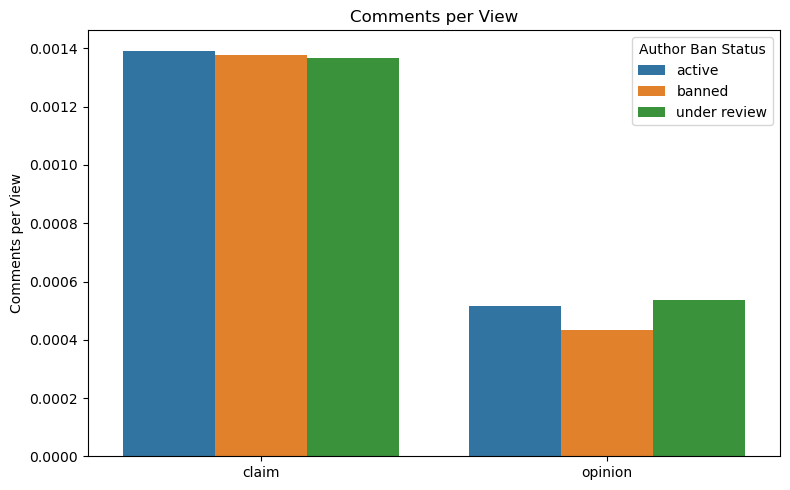

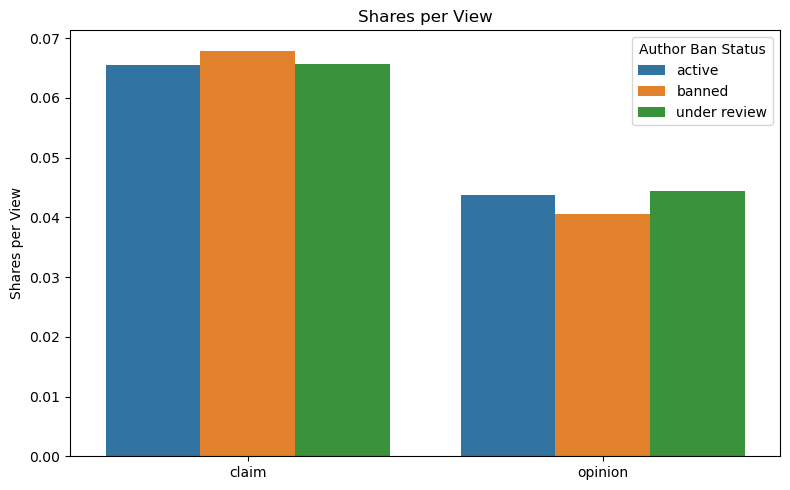

In [16]:
# ENGAGEMENT RATES PER VIEW BY CLAIM AND AUTHOR MODERATION STATUS

agg_data = data.groupby(
    ["claim_status", "author_ban_status"]
).agg(
    likes_per_view_mean=("likes_per_view", "mean"),
    comments_per_view_mean=("comments_per_view", "mean"),
    shares_per_view_mean=("shares_per_view", "mean"),
).reset_index()


def plot_grouped(metric, title, ylabel):
    plt.figure(figsize=(8,5))
    sns.barplot(
        data=agg_data,
        x="claim_status",
        y=metric,
        hue="author_ban_status",
        errorbar=None
    )
    plt.title(title)
    plt.xlabel("")  # ← entfernt X-Achsentitel
    plt.ylabel(ylabel)
    plt.legend(title="Author Ban Status")
    plt.tight_layout()
    plt.show()

# ---- LIKES ----
plot_grouped(
    "likes_per_view_mean",
    "Likes per View",
    "Likes per View"
)

# ---- COMMENTS ----
plot_grouped(
    "comments_per_view_mean",
    "Comments per View",
    "Comments per View"
)

# ---- SHARES ----
plot_grouped(
    "shares_per_view_mean",
    "Shares per View",
    "Shares per View"
)


Claim-based videos consistently show higher engagement rates than opinion-based videos across likes, comments, and shares.

Interestingly, engagement rates within each claim category are relatively similar across author ban statuses. This suggests that moderation status does not strongly affect engagement efficiency per view.

Overall, the results indicate that claim-driven content generates stronger audience interaction relative to its reach, regardless of the author’s moderation status.

---

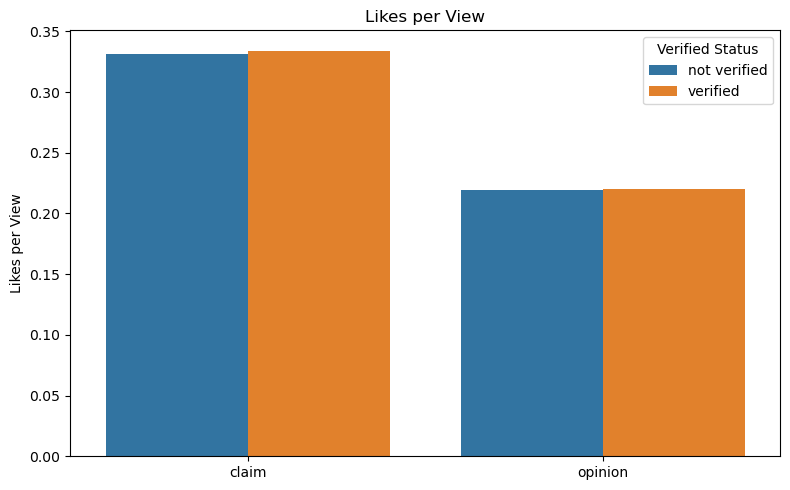

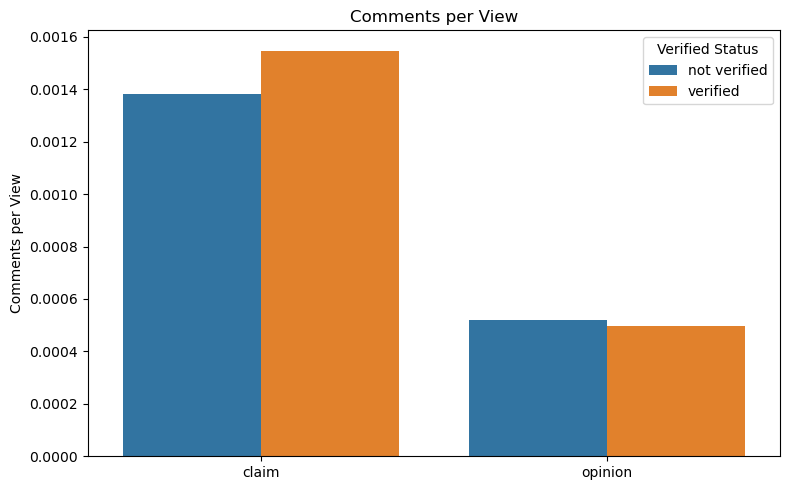

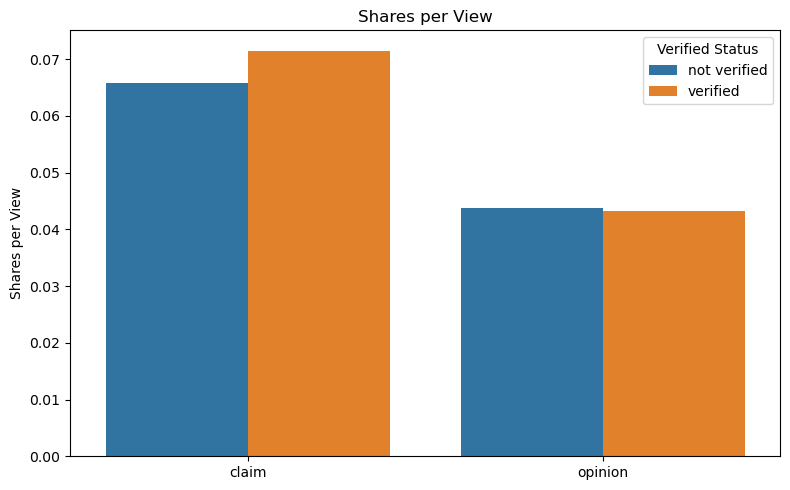

In [18]:
# ENGAGEMENT RATES PER VIEW BY CLAIM AND ACCOUNT VERIFICATION STATUS

agg_verified = data.groupby(
    ["claim_status", "verified_status"]
).agg(
    likes_per_view_mean=("likes_per_view", "mean"),
    comments_per_view_mean=("comments_per_view", "mean"),
    shares_per_view_mean=("shares_per_view", "mean"),
).reset_index()

agg_verified.head()

def plot_grouped(metric, title, ylabel):
    plt.figure(figsize=(8,5))
    sns.barplot(
        data=agg_verified,
        x="claim_status",
        y=metric,
        hue="verified_status",
        errorbar=None
    )
    plt.title(title)
    plt.xlabel("")
    plt.ylabel(ylabel)
    plt.legend(title="Verified Status")
    plt.tight_layout()
    plt.show()

# ---- LIKES ----
plot_grouped("likes_per_view_mean", "Likes per View", "Likes per View")

# ---- COMMENTS ----
plot_grouped("comments_per_view_mean", "Comments per View", "Comments per View")

# ---- SHARES ----
plot_grouped("shares_per_view_mean", "Shares per View", "Shares per View")


Verification status shows only marginal differences within each content category. Overall, engagement appears to be driven more by content type than by account verification.

# CONCLUSION:
## Across all analyses, content type is the key factor: claim-based videos consistently generate more views and higher engagement rates than opinion-based content. ##
## In contrast, moderation and verification status play only a minor role in engagement efficiency. Overall, what is being posted matters more than who is posting it. ## 
